# Assignment 2: Clustering California Housing with K-means

### CS 4774 Machine Learning - Department of Computer Science - University of Virginia
"Tonight, more than 130,000 Californians will go to sleep homeless. That’s enough to fill Dodger Stadium, AT&T Park and Petco Park. The biggest culprit is rising housing costs. From 2000 to 2014, median rent in California increased by more than one-third, while real incomes for renters fell by 7 percent. Today, 1.5 million Californians spend more than half their income on housing. This crisis threatens not just low-income families but our entire economy, driving businesses to relocate to states in which their employees can afford to live. - **Business Insider, Sep 2018.**"

![Half of the homes in San Franciso is now one million or above](https://www.travelinusa.us/wp-content/uploads/sites/3/2017/11/Painted-Ladies-San-Francisco-01.jpg).

In this assignment, you will attempt to cluster the California Housing by implementing and analyzing the k-means algorithm to the data. K-Means is one of the most popular clustering algorithms. K-means stores k-centroids that it uses to define clusters. A point is considered to be in a particular cluster if it is closer to that cluster's centroid than any other centroid. For references, you may refer to my lecture on K-means or Chapter 2 of the textbook if you need additional sample codes to help with your assignment. For deliverables, you must write code in Python and submit this Jupyter Notebook file (.ipynb) to earn a total of 100 pts. You will gain points depending on how you perform in the following sections.

**Note**: In order for your assignment to be graded, you must save your Notebook filename under this format: **yourUvaUserId_assignment_2_kmeans.ipynb**.


---
## 1. PRE-PROCESSING THE DATA (10 pts)

Download the California Housing dataset from the below link. This dataset includes statistics about the median income, median age, average number of rooms per person, average number of persons in a household etc. The statistics were gathered per geographical block.

**Data Acquiring:** Download the dataset from https://www.kaggle.com/camnugent/california-housing-prices

**Data Discovery, Visualization, and Cleaning:** Fortunately, this step have been given to you from chapter 2. However, you should review them and write the code necessary for the purposes of this assignment.

In [ ]:
# You might want to use the following package
import sklearn # general ml package
import numpy as np # fundamental package for scientific computing alias as np
import os # to run file I/O operation
import pandas as pd

from pandas.plotting import scatter_matrix # optional
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Your code goes here for this section.
def loadBostonHousingData():
  # The column names are adopted from the dataset page on Kaggle
  housing = pd.read_csv("housing.csv")
  return housing

housing = loadBostonHousingData()

# Data Discovery
print(housing.info())

print("-------------------------------------")

print(housing.describe())

print(housing.shape)

# Data Size: 1.6Mb
# Data Entries: 20640
# Data Features: 10 total columns
# Yes there is a categorical data type (ocean proximity)
# We can learn some very important numerical data for the columns that contain
# numerical information.
# We can also see there are only missing values for the total bedroom column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB
None
-------------------------------------
          longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.76308

                    longitude  latitude  housing_median_age  total_rooms  \
longitude            1.000000 -0.924664           -0.108197     0.044568   
latitude            -0.924664  1.000000            0.011173    -0.036100   
housing_median_age  -0.108197  0.011173            1.000000    -0.361262   
total_rooms          0.044568 -0.036100           -0.361262     1.000000   
total_bedrooms       0.069608 -0.066983           -0.320451     0.930380   
population           0.099773 -0.108785           -0.296244     0.857126   
households           0.055310 -0.071035           -0.302916     0.918484   
median_income       -0.015176 -0.079809           -0.119034     0.198050   
median_house_value  -0.045967 -0.144160            0.105623     0.134153   

                    total_bedrooms  population  households  median_income  \
longitude                 0.069608    0.099773    0.055310      -0.015176   
latitude                 -0.066983   -0.108785   -0.071035      -0.079809   
housing_

<ipython-input-2-8fb5955106b8>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = housing.corr()


array([[<Axes: xlabel='longitude', ylabel='longitude'>,
        <Axes: xlabel='latitude', ylabel='longitude'>,
        <Axes: xlabel='housing_median_age', ylabel='longitude'>,
        <Axes: xlabel='total_rooms', ylabel='longitude'>,
        <Axes: xlabel='total_bedrooms', ylabel='longitude'>,
        <Axes: xlabel='population', ylabel='longitude'>,
        <Axes: xlabel='households', ylabel='longitude'>,
        <Axes: xlabel='median_income', ylabel='longitude'>,
        <Axes: xlabel='median_house_value', ylabel='longitude'>],
       [<Axes: xlabel='longitude', ylabel='latitude'>,
        <Axes: xlabel='latitude', ylabel='latitude'>,
        <Axes: xlabel='housing_median_age', ylabel='latitude'>,
        <Axes: xlabel='total_rooms', ylabel='latitude'>,
        <Axes: xlabel='total_bedrooms', ylabel='latitude'>,
        <Axes: xlabel='population', ylabel='latitude'>,
        <Axes: xlabel='households', ylabel='latitude'>,
        <Axes: xlabel='median_income', ylabel='latitude'>,
    

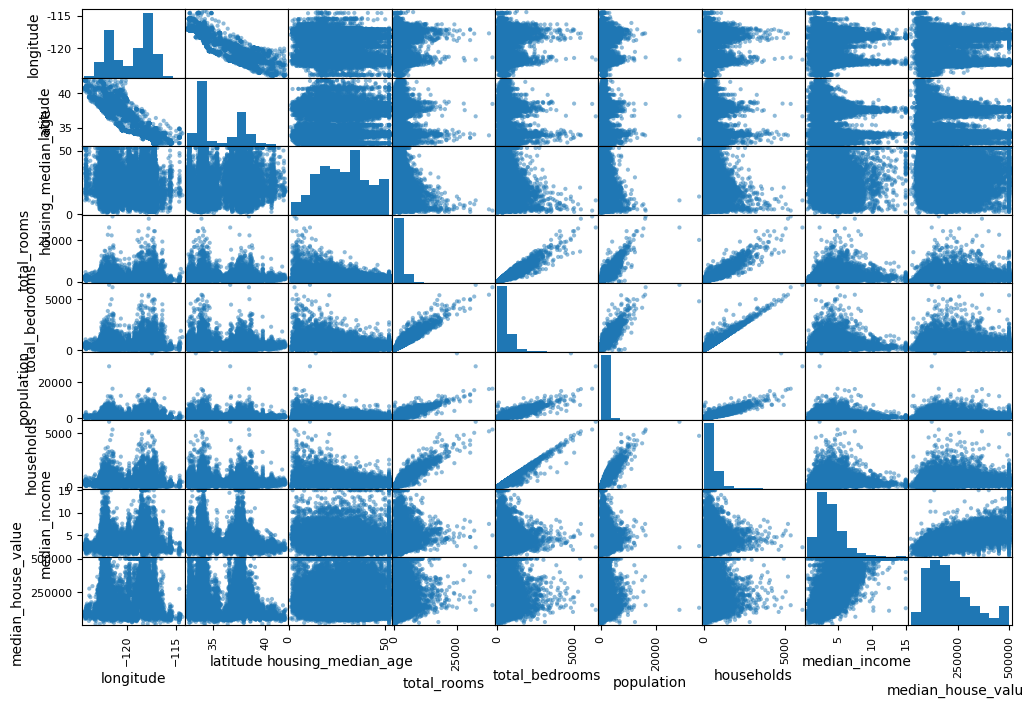

In [ ]:
# DATA VISUALIZATION

corr_matrix = housing.corr()
print(corr_matrix)

# generating a plot of the correlations between all features
scatter_matrix(housing, figsize=(12, 8))

<Axes: xlabel='longitude', ylabel='latitude'>

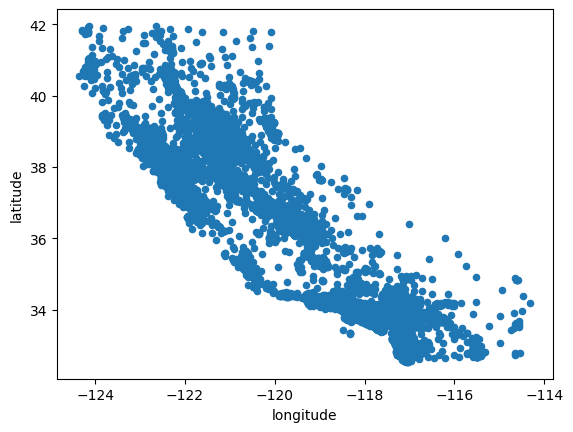

In [ ]:
housing.plot(kind="scatter", x="longitude", y="latitude")

In [10]:
# DATA CLEANING VIA PIPELINE

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer

# given that we are clustering we do not need to split up into labels and features
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

# writing a numerical pipeline to deal with scaling and filling in null data
num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])

# given that this data has null categorical values we will have to write a cat_pipeline
# to properly fill all missing categorical data and do the encoding
cat_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="most_frequent")),
        ('oneHotEncoder', OneHotEncoder(handle_unknown='ignore')),
    ])

# creating housing_num and housing_cat
housing_num = train_set.select_dtypes(include=[np.number])
housing_cat = train_set.select_dtypes(include=[object])

# writing a full pipeline this tells which columns are categorical vs numerical
num_attribs = list(housing_num)
cat_attribs = list(housing_cat)

# when we call full_pipeline the num will be sent down num_pipeline and cat sent to OHE
full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        # we need the handle_unknown is to prevent the pipeline from breaking
        # with new unseen categorical data. This is normally the best course of
        # action b/c we only want to pass model the training data and it needs to
        # be able to gracefully handle unseen categories on its own
        ("cat", cat_pipeline, cat_attribs),
    ])
# process and transform the training data via fit_transform()
# process and transform any validation and testing data via transform()
train_set_prepared = full_pipeline.fit_transform(train_set)

# we want to fit encoders and scalers and transform the training data, while
# not fitting only transforming the validation and testing data.
test_set_prepared = full_pipeline.transform(test_set)

print(train_set_prepared.shape)
print(test_set_prepared.shape)
print("-----------------------------------------")
print(train_set_prepared)
print(test_set_prepared)

(16512, 14)
(4128, 14)
-----------------------------------------
[[ 1.27258656 -1.3728112   0.34849025 ...  0.          0.
   1.        ]
 [ 0.70916212 -0.87669601  1.61811813 ...  0.          0.
   1.        ]
 [-0.44760309 -0.46014647 -1.95271028 ...  0.          0.
   1.        ]
 ...
 [ 0.59946887 -0.75500738  0.58654547 ...  0.          0.
   0.        ]
 [-1.18553953  0.90651045 -1.07984112 ...  0.          0.
   0.        ]
 [-1.41489815  0.99543676  1.85617335 ...  0.          1.
   0.        ]]
[[ 0.28534728  0.1951     -0.28632369 ...  0.          0.
   0.        ]
 [ 0.06097472 -0.23549054  0.11043502 ...  0.          0.
   0.        ]
 [-1.42487026  1.00947776  1.85617335 ...  0.          1.
   0.        ]
 ...
 [-1.23041404  0.78014149 -0.28632369 ...  0.          0.
   0.        ]
 [-0.08860699  0.52740357  0.58654547 ...  0.          0.
   0.        ]
 [ 0.60445493 -0.66608108 -0.92113763 ...  0.          0.
   0.        ]]


- - -
## 2. IMPLEMENTING K-MEANS (40 pts)

You must implement your own version of K-Means Algorithm. Input a cluster count K and M data points each with its own vector of N features, along with the choice of a distance measure; then:

1. Initialize K centroids. In our case, a centroid is just the average of all data in a cluster.
2. Assign each data point to the cluster that has the closest centroid base on a **distance measure** below.
3. After all data points have been assigned to clusters, recalculate the centroids for each cluster (as averages of all points in the cluster).
4. Repeat the data assignments and centroid calculations until no change in housing assignment occurs between iterations.

**Distance Measures:** Your implementation must include three distance metrics: Manhattan Distance, Euclidean Distance, Sup Distance. These 3 distance metrics can be generalized by the Minkovski Distance:
$D(\mathbf{x},\mathbf{y}) = \sqrt[\leftroot{2}\uproot{2}p]{\sum\limits_{i=1}^n|x_i - y_i|^p}$ where $p=1$ for Mahattan, $p=2$ for Euclidean, and $p=\infty$ for Sup Distance.

**Implementation Notes:** Note that your functions should return distance measures; that is, the returned value should be high if the two vectors are dissimilar, low if they are similar, and zero if they are completely identical.

In [8]:
import random

# Function: K Means
# -------------
# K-Means is an algorithm that takes in a dataset and a constant
# k and returns k centroids (which define clusters of data in the
# dataset which are similar to one another).

# a and b are the two vectors being compared, power is what type of metric we want
def minkovski_dist(a, b, power):
  # if the power for minkovski distance is infinity
  if(power == "inf"):
    max_diff = 0
    for i in range(len(a)):
      if(abs(a[i] - b[i]) > max_diff):
        max_diff = abs(a[i] - b[i])

    # return the maximum difference between vectors
    return max_diff

  # if the power is anything less
  else:
    sum = 0
    for i in range(len(a)):
      sum += pow(abs(a[i] - b[i]), power)

    # return the nth root
    return sum**(1/power)


# I am adding a distance measure variable so that I can easily change which distance measure I use
def k_means(training_set, k, distance_measure):
  # centroids array to keep track of updated centroids
  centroids = []
  count_changes = []

  # add min_distance, nearest centroid columns, and prev_min_dist to each data point in training data
  # default min_dist is 999999999 and nearest centroid is k+1
  train_set_prepared_b = np.c_[training_set, np.full([len(training_set), 1], 999999)]
  train_set_prepared_b = np.c_[train_set_prepared_b, np.full([len(train_set_prepared_b), 1], k+1)]
  train_set_prepared_b = np.c_[train_set_prepared_b, np.full([len(train_set_prepared_b), 1], k+1)]

  # 1: Initialize K centroids (take random subsets of data and avg them to form K)
  for i in range(k):
    # pick any number from 0 to one less than training set to be start of slice
    rand_start = random.randrange(len(training_set)-1)
    # pick any number from start+1 to end of training set to be end of slice
    rand_end = random.randrange(rand_start, len(training_set))

    # slice the training set and then take the average to generate our random centroids
    subset = training_set[rand_start:rand_end]

    centroid = np.mean(subset, axis=0)
    centroids.append(centroid)


  # Repeat assignment/recalculation until no changes occur
  change_count = len(training_set)

  # train_set_prepared_b:
  # 14 - min_distance
  # 15 - current closest centroid
  # 16 - previous iteration closest centroid (check if changed)
  while (change_count != 0):
    change_count = 0
    # loop over ALL datapoints and assign to closest centroid
    for i in range(len(training_set)):
      # find the centroid the point is closest to
      # once loop is done we will have the closest centroid for the point based on mink distance
      for j in range(k):
        # calc the distance from the point to ALL centroids to see what is closest
        distance = minkovski_dist(training_set[i], centroids[j], distance_measure)
        # update distance
        if(distance < train_set_prepared_b[i][14]):
          train_set_prepared_b[i][14] = distance
          train_set_prepared_b[i][15] = j

    # recalculcate the k centroids assuming above membership is correct
    for i in range(k):
      # grab all the non meta data rows from the training set where the closest centroid is i
      centroids[i] = np.mean(train_set_prepared_b[train_set_prepared_b[:, 15] == i, 0:14], axis=0)

    # check to see how many objects changed membership
    for i in range(len(training_set)):
      # if the current iteration closest centroid doesnt equal the previous one
      if(train_set_prepared_b[i][15] != train_set_prepared_b[i][16]):
        # set the previous to equal the current and update the count changes
        train_set_prepared_b[i][16] = train_set_prepared_b[i][15]
        change_count += 1

    # append the number of changes to the count array
    count_changes.append(change_count)

  # centroids has the final values of the k-centroids
  # train_set_prepared_b contains all the data as well as their distance to the centroid and closest centroid value
  # count_changes is an array that tracks how much data changed classes per iteration
  return centroids, train_set_prepared_b, count_changes

# matrix[i][0] contains the centroid data, matrix[i][1:n] contains data in that cluster
(centroids1, matrix1, changes1) = k_means(train_set_prepared, 2, 1)
(centroids2, matrix2, changes2) = k_means(train_set_prepared, 2, 2)
(centroidsinf, matrixinf, changesinf) = k_means(train_set_prepared, 2, "inf")

Iterations Until Convergence
Manhattan:  6  | Euclidean:  9  | Sup:  3


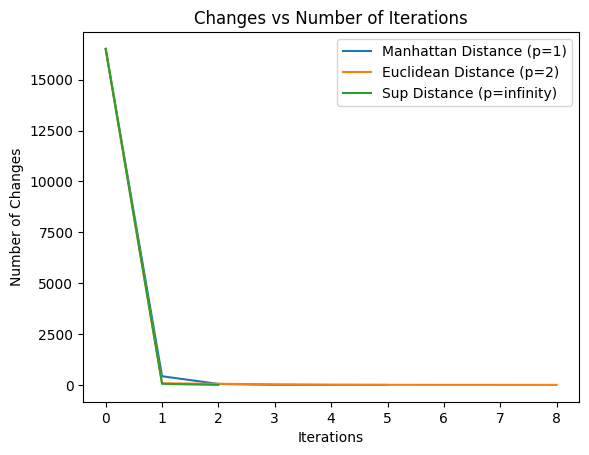

In [ ]:
# Plotting the number of iterations before reaching 0 to determine which distance measurement is best
import matplotlib
import matplotlib.pyplot as plt

print("Iterations Until Convergence")
print("Manhattan: ", len(changes1), " | Euclidean: ", len(changes2), " | Sup: ", len(changesinf))

plt.xlabel('Iterations')
plt.ylabel('Number of Changes')
plt.title('Changes vs Number of Iterations')

# create the plots based on the above differing models
plt.plot(changes1, label="Manhattan Distance (p=1)")
plt.plot(changes2, label="Euclidean Distance (p=2)")
plt.plot(changesinf, label="Sup Distance (p=infinity)")

# creating a legend for the plot
leg = plt.legend(loc='upper right')


- - -
## 3. CLUSTERING HOUSING INTO REGIONS (40 pts)

Now that you have implemented the K-Means as the clustering algorithm. Applying the algorithm for k=2 clusters to see if you can split California into a Northern and Southern regions.

* **Cluster the data:** Report the SSE (sum squared error), cluster means, within cluster standard deviations for each attribute, etc. Visualize the clustering by plot the latitude along the X axis and longitude along the Y axis. You should get a plot that looks roughly in the shape of California (see Chapter 2 for more details). Using the cluster means and std. deviations as representative values in the cluster, what can you say about the clusters that were found? How do they compare with what you know about cities and areas in California? What can you attribute the gaps to? It will definitely be helpful to have a map of California handy.

* **Change the number of clusters:** Increase the value of k from 2 to 3,4,..,10 and repeat the clustering process above. Record cluster means and standard deviations. When you change k, do any additional patterns emerge? If so, what are they? Applying the algorithm for 10 clusters to see if it clearly identified the silicon valley area as one cluster (where houses are relatively new and expensive, median income is high), the area of San Francisco as another etc. While SF and Silicon Valley may have a somewhat similar profile (at least, compared with mid CA), they were separated mainly due to the latitude/longtitue properties, that involve a dimension of geographical cohesiveness.


In [ ]:
# Testing what distance measure is best for K=2
# Manhattan Distance
print("Manhattan Distance (pow=1)\n")
for i in range(2):
  # centroid
  centroid = centroids1[i]
  print("Cluster", i, "centroid:", centroid)
  print("------------------")

  # SSE
  sse = 0
  # array containing distances from all the points in that cluster to get SSE iterate thru and sum squares
  for j in range(len(matrix1[matrix1[:, 15] == i, 14])):
    sse += pow(matrix1[matrix1[:, 15] == i, 14][j], 2)

  print("Cluster", i, "SSE:", sse)
  print("------------------")

  # within cluster stddev for each attribute
  std_dev = np.std(matrix1[matrix1[:, 15] == i, 0:14], axis=0)
  print("Cluster", i, "std. dev array:", std_dev)
  print("---------------------------------------------------------------\n")

# Euclidean Distance
print("Euclidean Distance (pow=2)\n")
for i in range(2):
  # centroid
  centroid = centroids2[i]
  print("Cluster", i, "centroid:", centroid)
  print("------------------")

  # SSE
  sse = 0
  # array containing distances from all the points in that cluster to get SSE iterate thru and sum squares
  for j in range(len(matrix2[matrix2[:, 15] == i, 14])):
    sse += pow(matrix2[matrix2[:, 15] == i, 14][j], 2)

  print("Cluster", i, "SSE:", sse)
  print("------------------")

  # within cluster stddev for each attribute
  std_dev = np.std(matrix2[matrix2[:, 15] == i, 0:14], axis=0)
  print("Cluster", i, "std. dev array:", std_dev)
  print("---------------------------------------------------------------\n")

# Sup Distance
print("Sup Distance (pow=inf)\n")
for i in range(2):
  # centroid
  centroid = centroidsinf[i]
  print("Cluster", i, "centroid:", centroid)
  print("------------------")

  # SSE
  sse = 0
  # array containing distances from all the points in that cluster to get SSE iterate thru and sum squares
  for j in range(len(matrixinf[matrixinf[:, 15] == i, 14])):
    sse += pow(matrixinf[matrixinf[:, 15] == i, 14][j], 2)

  print("Cluster", i, "SSE:", sse)
  print("------------------")

  # within cluster stddev for each attribute
  std_dev = np.std(matrixinf[matrixinf[:, 15] == i, 0:14], axis=0)
  print("Cluster", i, "std. dev array:", std_dev)
  print("---------------------------------------------------------------\n")

Manhattan Distance (pow=1)

Cluster 0 centroid: [-1.23446651e-01  1.21977802e-01  2.35252245e-01 -4.48386169e-01
 -5.01778449e-01 -4.70903353e-01 -5.04911003e-01  4.53823793e-02
  1.31915195e-02  4.28404214e-01  3.21108076e-01  3.90167772e-04
  1.32754584e-01  1.17342957e-01]
------------------
Cluster 0 SSE: 462684.93986325676
------------------
Cluster 0 std. dev array: [1.00269351 1.01409179 0.98263394 0.34554697 0.32145854 0.35637562
 0.32467863 1.06126415 1.04655824 0.4948475  0.46690222 0.01974881
 0.33930931 0.32182851]
---------------------------------------------------------------

Cluster 1 centroid: [ 0.20216854 -0.19976301 -0.38527253  0.73432189  0.8217624   0.77119827
  0.82689259 -0.07432271 -0.02160375  0.47108626  0.30910543  0.
  0.07875399  0.14105431]
------------------
Cluster 1 SSE: 437336.4351655637
------------------
Cluster 1 std. dev array: [0.9619442  0.94299875 0.90405517 1.25445825 1.17508761 1.21317737
 1.16781893 0.88560253 0.91826003 0.4991633  0.4621247

Sup Distance (pow=inf)

Cluster 0 centroid: [-4.46666272e-01  4.80746718e-01  2.53963858e-01  3.76647447e-02
  8.21402661e-02  9.69030569e-03  7.03360581e-02 -3.57776038e-01
 -3.24606990e-01  3.40778786e-01  3.95126613e-01  2.38891543e-04
  1.69254658e-01  9.46010511e-02]
------------------
Cluster 0 SSE: 22835.308322398098
------------------
Cluster 0 std. dev array: [0.93751969 0.97560681 1.01395116 1.195058   1.18218665 1.02095013
 1.17007974 0.69300374 0.74953071 0.4739711  0.48887787 0.01545427
 0.37497669 0.2926631 ]
---------------------------------------------------------------

Cluster 1 centroid: [ 4.59396810e-01 -4.94448590e-01 -2.61202140e-01 -3.87382362e-02
 -8.44813646e-02 -9.96649130e-03 -7.23407221e-02  3.67973094e-01
  3.33858688e-01  5.51351351e-01  2.35749386e-01  2.45700246e-04
  5.36855037e-02  1.58968059e-01]
------------------


Cluster 1 SSE: 21723.910253040573
------------------
Cluster 1 std. dev array: [0.84158458 0.75324692 0.9146255  0.74610553 0.75962307 0.97788456
 0.78107147 1.12583438 1.10944065 0.49735605 0.42446627 0.0156729
 0.22539603 0.3656463 ]
---------------------------------------------------------------



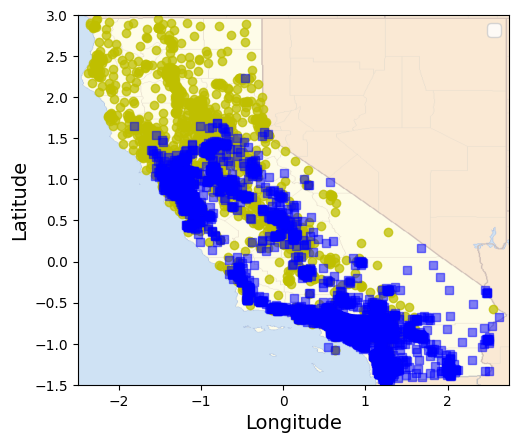

In [ ]:
# After examining the above results I am going to proceed with the Sup Distance
# The Sup distance consistently requires less iterations to reach convergence and
# it has a much smaller SSE and similar std. dev than both the Manhattan and Euclidean results

# Your code goes here
# Sup Distance
print("Sup Distance (pow=inf)\n")
for i in range(2):
  # centroid
  centroid = centroidsinf[i]
  print("Cluster", i, "centroid:", centroid)
  print("------------------")

  # SSE
  sse = 0
  # array containing distances from all the points in that cluster to get SSE iterate thru and sum squares
  for j in range(len(matrixinf[matrixinf[:, 15] == i, 14])):
    sse += pow(matrixinf[matrixinf[:, 15] == i, 14][j], 2)

  print("Cluster", i, "SSE:", sse)
  print("------------------")

  # within cluster stddev for each attribute
  std_dev = np.std(matrixinf[matrixinf[:, 15] == i, 0:14], axis=0)
  print("Cluster", i, "std. dev array:", std_dev)
  print("---------------------------------------------------------------\n")

import matplotlib.image as mpimg
# Read the image of California (make sure you have it in the directory)
california_img=mpimg.imread('california.png')

# matrix data of the clusters
cluster0_data = matrixinf[matrixinf[:, 15] == 0, 0:14]
cluster1_data = matrixinf[matrixinf[:, 15] == 1, 0:14]

# show the image, labels, and legend
plt.imshow(california_img, extent=[-2.5, 2.75, -1.5, 3], alpha=0.5,
           cmap=plt.get_cmap("jet"))
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)
plt.legend(fontsize=12)

# x = longitude, y = latitude (grab all the data for both clusters matrix[row, col])
# we want to get all of the rows for the 0th/1st columns
plt.plot(cluster0_data[:, 0], cluster0_data[:, 1], "yo", label="Cluster 0", alpha=0.75)
plt.plot(cluster1_data[:, 0], cluster1_data[:, 1], "bs", label="Cluster 1", alpha=0.5)
plt.show()

# Using that distance metric for k=2...10


# Your paragraph goes here for this section

Now that you have implemented the K-Means as the clustering algorithm. **Applying the algorithm for k=2 clusters to see if you can split California into a Northern and Southern regions.**

**Cluster the data**: Report the SSE (sum squared error), cluster means, within cluster standard deviations for each attribute, etc. Visualize the clustering by plot the latitude along the X axis and longitude along the Y axis. You should get a plot that looks roughly in the shape of California (see Chapter 2 for more details). Using the cluster means and std. deviations as representative values in the cluster, what can you say about the clusters that were found? How do they compare with what you know about cities and areas in California? What can you attribute the gaps to? It will definitely be helpful to have a map of California handy.
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

To start I have decided to use Sup Distance as my distance metric. This is because I compared the SSE, centroid, std. dev. of elements, and total number of iterations until convergence, and Sup Distance clearly had the best of all of them.

For two clusters Sup Distance had the following SSEs:
Cluster #0: SSE: 22835.308322398098
Cluster #1: SSE: 21723.910253040573
The values of the standard deviation and k-centroid values can be seen in the above output.

In the above plot we can see the two clusters. Cluster 0 in yellow and Cluster 1 in blue. The fact that the data looks in the general shape of California is the first good sign. Sup Distance also did the best job of splitting the points into two somewhat clear groups. It is not perfect but the yellow Cluster is mainly in the north and the blue Cluster is mainly in the south.

It makes sense that this is not perfectly separated into north and south because while we are graphing based on longitude and latitude we took into considerations all of the features in the training set and both northern and southern areas of California may have big and expensive properties, which could lead to the line not being perfect for just separating out north and south.

**Change the number of clusters:** Increase the value of k from 2 to 3,4,..,10 and repeat the clustering process above. Record cluster means and standard deviations. When you change k, do any additional patterns emerge? If so, what are they? Applying the algorithm for 10 clusters to see if it clearly identified the silicon valley area as one cluster (where houses are relatively new and expensive, median income is high), the area of San Francisco as another etc. While SF and Silicon Valley may have a somewhat similar profile (at least, compared with mid CA), they were separated mainly due to the latitude/longtitue properties, that involve a dimension of geographical cohesiveness.

In [11]:
k_centroids = []
k_matrixinf = []
k_changesinf = []

# populate the arrays with the necessary models to display cluster means and std. dev
for i in range(2,11):
  (centroidsinf, matrixinf, changesinf) = k_means(train_set_prepared, i, "inf")
  k_centroids.append(centroidsinf)
  k_matrixinf.append(matrixinf)
  k_changesinf.append(changesinf)

In [12]:
print("Info on Centroids, SSE, and Std Dev for k=2-10")
for i in range(2,11):
  for j in range(i):
    print("Number of Clusters:", i)
    # centroid
    centroid = k_centroids[i-2][j]
    print("Cluster", j, "centroid:", centroid)
    print("------------------")

    # SSE
    sse = 0
    # array containing distances from all the points in that cluster to get SSE iterate thru and sum squares
    for k in range(len(k_matrixinf[i-2][k_matrixinf[i-2][:, 15] == j, 14])):
      sse += pow(k_matrixinf[i-2][k_matrixinf[i-2][:, 15] == j, 14][k], 2)

    print("Cluster", j, "SSE:", sse)
    print("------------------")

    # within cluster stddev for each attribute
    std_dev = np.std(k_matrixinf[i-2][matrixinf[:, 15] == j, 0:14], axis=0)
    print("Cluster", j, "std. dev array:", std_dev)
    print("---------------------------------------------------------------\n")

Info on Centroids, SSE, and Std Dev for k=2-10
Number of Clusters: 2
Cluster 0 centroid: [-0.32823079  0.41108461 -0.37959456  0.20724395  0.25781067  0.25358241
  0.24787317 -0.29216462 -0.3853567   0.34083343  0.46022271  0.
  0.11100907  0.0879348 ]
------------------
Cluster 0 SSE: 26117.952384146167
------------------
Cluster 0 std. dev array: [0.5059124  0.5512848  0.57323749 0.50700507 0.51182803 0.50354679
 0.53458497 0.67087388 0.60538248 0.39508747 0.47207927 0.
 0.30045145 0.19911208]
---------------------------------------------------------------

Number of Clusters: 2
Cluster 1 centroid: [ 3.66519471e-01 -4.59038335e-01  4.23874911e-01 -2.31419310e-01
 -2.87884728e-01 -2.83163233e-01 -2.76788000e-01  3.26246120e-01
  4.30309217e-01  5.60440969e-01  1.56133829e-01  5.12754775e-04
  1.13703371e-01  1.69209076e-01]
------------------
Cluster 1 SSE: 17179.85504973418
------------------
Cluster 1 std. dev array: [0.17438412 0.16484804 0.53324536 0.28409649 0.29295016 0.28833804

Applying the algorithm for 10 clusters to see if it clearly identified the silicon valley area as one cluster (where houses are relatively new and expensive, median income is high), the area of San Francisco as another etc. While SF and Silicon Valley may have a somewhat similar profile (at least, compared with mid CA), they were separated mainly due to the latitude/longtitue properties, that involve a dimension of geographical cohesiveness.

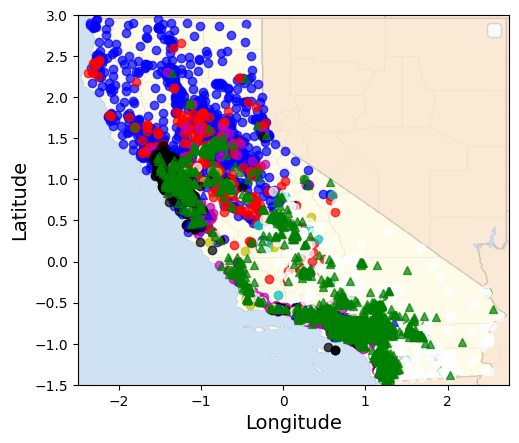

In [ ]:
# graph the 10 cluster algorithm
(centroidsinf_10, matrixinf_10, changesinf_10) = k_means(train_set_prepared, 10, "inf")

# cluster data array that has indices which contain matrices of data points for each of the 10 clusters
cluster_data = []
for i in range(10):
  cluster_data.append(matrixinf_10[matrixinf_10[:, 15] == i, 0:14])

# color array to color each cluster differently
colors = ["bo", "go", "ro", "co", "mo", "yo", "ko", "wo", "b^", "g^"]

import matplotlib.image as mpimg
# Read the image of California (make sure you have it in the directory)
california_img=mpimg.imread('california.png')

# show the image, labels, and legend
plt.imshow(california_img, extent=[-2.5, 2.75, -1.5, 3], alpha=0.5,
           cmap=plt.get_cmap("jet"))
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)
plt.legend(fontsize=12)

# x = longitude, y = latitude (grab all the data for both clusters matrix[row, col])
# we want to get all of the rows for the 0th/1st columns
for i in range(10):
  plt.plot(cluster_data[i][:, 0], cluster_data[i][:, 1], colors[i], label="Cluster " + str(i), alpha=0.7)

plt.show()

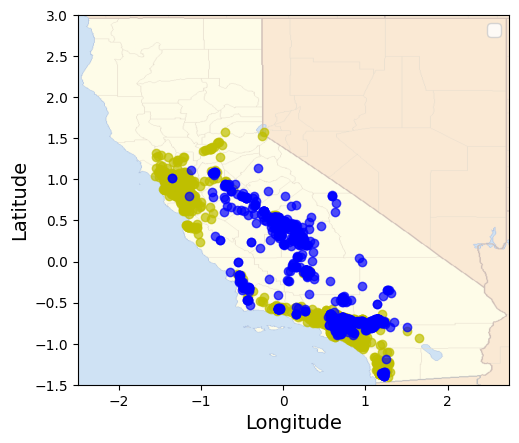

In [16]:
# Plot Highest and lowest centroid clusters on map for k_matrixinf[8]
# This is the 10 cluster method we want to visualize the 8th cluster (lowest income)
# and the 2nd cluster (highest income) to see where these fall in California

import matplotlib.image as mpimg
import matplotlib
import matplotlib.pyplot as plt
# Read the image of California (make sure you have it in the directory)
california_img=mpimg.imread('california.png')

# the 8th index in k_matrix contains the 10 cluster data
# we want to grab the values where the closest cluster is 2 and 8 and graph them
cluster2_data = k_matrixinf[8][k_matrixinf[8][:, 15] == 2, 0:14]
cluster8_data = k_matrixinf[8][k_matrixinf[8][:, 15] == 8, 0:14]

# show the image, labels, and legend
plt.imshow(california_img, extent=[-2.5, 2.75, -1.5, 3], alpha=0.5,
           cmap=plt.get_cmap("jet"))
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)
plt.legend(fontsize=12)

# x = longitude, y = latitude (grab all the data for both clusters matrix[row, col])
# we want to get all of the rows for the 0th/1st columns
plt.plot(cluster2_data[:, 0], cluster2_data[:, 1], "yo", label="Cluster 2", alpha=0.7)
plt.plot(cluster8_data[:, 0], cluster8_data[:, 1], "bo", label="Cluster 8", alpha=0.7)

- - -
## 4. WRITING ON THE INTUITION FOR THE CALIFORNIA HOUSING CRISIS (10 pts)

This question is a qualitative one, and is intended to let you experiment with a real world clustering task. Hopefully it gives you some intuition as for how the preset number of clusters affects the clustering results. Too few clusters may not reveal the information that is in the data. Too many clusters may hurt data analysis as well, as it may not generalize (and in this sense, it is equivalent to over fitting).

Write at least one paragraph to demonstrate your intuition on the California Housing Crisis. You might also want to mention some possible solutions to solve it. You will receive credits based upon your insights and intuitions on this challenge.





As we can see from the first graph where k=2, there was not a lot of solid information we could gain from this. It did a somewhat decent job of separating northern and southern california and from the cluster centroids we could gather some information about what the mean values were from both areas. The 7th index in the centroid contains median income and the 8th contains median house value for the cluster. When k=2 we can see that in cluster 0, the northern yellow points, after scaling we have the median income is -0.36 and the median house value is -0.325. In cluster 1, the southern blue dots, after scaling we have the median income is 0.37 and the median house value is 0.33. From this we can gain that on average housing in northern california is cheaper than southern california.

When we take a look at the graph where k=10, we can see numerous colorful clusters that split up most of california. When we examine the centroids for the 10 cluster we can see that cluster 2 (yellow dots above) have the highest income and house value, and cluster 8 (blue dots above) have the lowest income and housing value. While there is some overlap the general trend is houses right on the shore, San Diego, Los Angeles, Silicon Valley, and San Francisco contain some of the highest incomes and housing value. While the cheapest housing is in central California.

After examining the data one potential solution to help with the California housing crisis is to create new jobs in central California. There is a pretty strong correlation where high incomes also have high median house values. So if some jobs were shifted out of Silicon Valley/Los Angeles area to central California it would balance out the median income in these areas and hopefully make the housing market more manageable across all of California rather than just having huge migrations of people flowing from one city to the next.

- - -
### NEED HELP?

In case you get stuck in any step in the process, you may find some useful information from:

 * Consult my lectures and/or the textbook
 * Talk to the TA, they are available and there to help you during their OH.
 * Come talk to me or email me <nn4pj@virginia.edu> with subject starting "CS4774 Assignment 2:...".

Best of luck and have fun!